In [1]:
%load_ext autoreload
%matplotlib inline
from IPython.display import display

In [2]:
# python -m pip install 'git+https://github.com/MaureenZOU/detectron2-xyz.git'

import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import sys
sys.path.append(".")
sys.path.append("../../")
import os

from utils.logging import CustomLogger
from utils import logging
from agents import agent_factory

from executor import SimpleExecutor, LineWiseExecutor

from utils.image_utils import visualize_image, resize_image


/home/kaixin/anaconda3/envs/dom/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
logger = CustomLogger()
logging.set_logger(logger)

Specify Your task here.

In [9]:
# prompt="""Task: Put the red block into the green bowl."""
prompt="""Task: Put the remote and the tape on the keyboard."""

In [10]:
image = Image.open("/home/kaixin/Desktop/LargePlanner/tests/assets/images/table_top.png")
agent = agent_factory("DetVLM")

Input image:


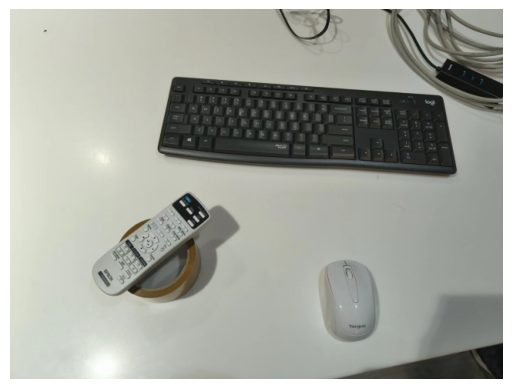

PlanResult(success=True,
 exception=None,
plan_raw="To complete the task, I will first pick up the tape (object 3) since it does not have any other objects on top of it, and then place it on top of the keyboard (object 1). After that, I will pick up the remote (object 2) and place it on top of the keyboard as well. I will ensure that the objects are placed without colliding with each other by using appropriate offsets.\n\n```python\n# Pick up the tape and place it on the keyboard\npick(obj=regions[3])\nplace(obj=regions[1], orientation='on_top_of', offset=[0.3, 0.5])\n\n# Pick up the remote and place it on the keyboard next to the tape\npick(obj=regions[2])\nplace(obj=regions[1], orientation='on_top_of', offset=[0.7, 0.5])\n```",
 masks=<3 masks>,
 prompt='Task: Put the remote and the tape on the keyboard.',
 plan_code="\n# Pick up the tape and place it on the keyboard\npick(obj=regions[2])\nplace(obj=regions[0], orientation='on_top_of', offset=[0.3, 0.5])\n\n# Pick up the remote and p

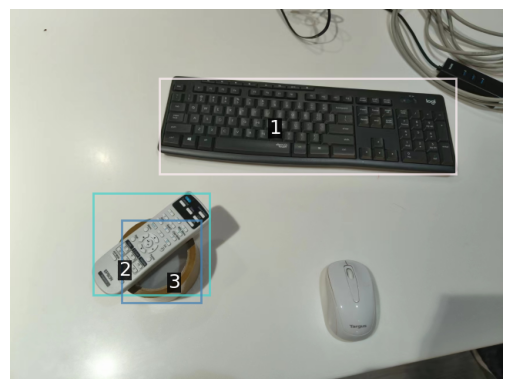

In [11]:
print("Input image:")
visualize_image(image)
plan_result = agent.try_plan(prompt, image)
print(plan_result)

if plan_result.success:
    print("Annotated image: ")
    visualize_image(plan_result.annotated_image)
    # Build a context containing the masks for the plan code to access
    masks = {"regions": [mask["segmentation"] for mask in plan_result.masks]}




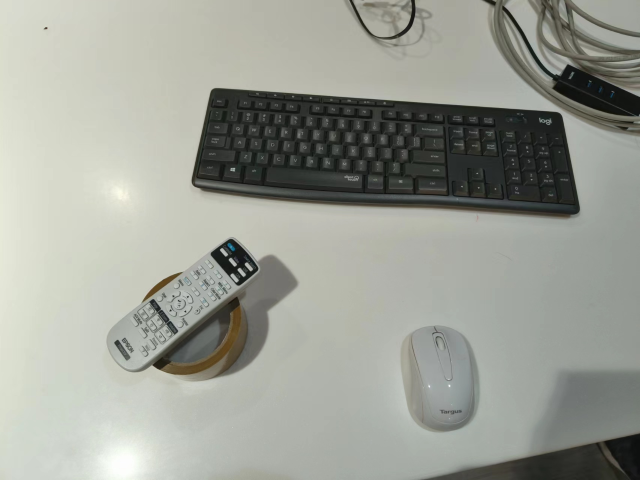
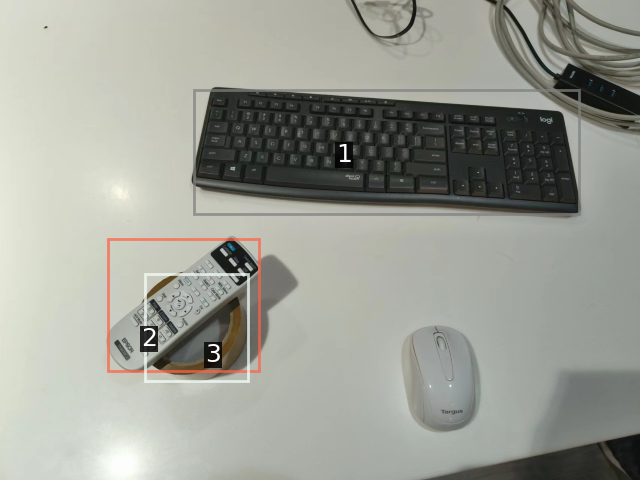

In [7]:
logging.get_logger().display_html_logs_in_notebook()

In [8]:
logger.save_logs_to_html_file("result.html")